In [218]:
import numpy as np
from numpy.random import binomial
import math

def log(x):
	return math.log(x, 2)

def getValFromSeq(seq):
    intseq = [str(s) for s in seq]
    strVal = "".join(intseq)
    return int(strVal, 2)

#calculates entropy for given bernoullie distribution of rate p
def calculate_entropy(p):
	return -(p*log(p)+ (1-p)*log(1-p))


#visualization of entropy of a bernoullie random variable 
def Entropy_visual(maxVal):
    x=[]
    I = []
    for i in range(1, maxVal):
        I.append(i/maxVal)
        x.append(calculate_entropy(i/maxVal))
    return x, I

# Generate a sequence of binomial strings given an input length. Return type list 
def generate_sequence(Len, p):
	return binomial(n=1, p=p,size=Len)

def getTypicalPerc(TypSet, X_):
    a = len(set(TypSet))
    b = len(set(X_))
    return a/b, a, b

def sample_mean_log_prob(sequence_vector, p):
	sum = 0
	for x in sequence_vector:
		sum += (log(p) if x==1 else log(1-p))
	return -sum/len(sequence_vector)

def generate_examples(num_ex, Len, p):
	X_ = []
	for i in range(num_ex):
		X_.append(generate_sequence(Len, p))
	return X_


def get_typical_set(X_train, epsilon, p):
    entropy = calculate_entropy(p)
    Typical_set = []
    Tot=[]
    for x_train in X_train:
        aa = getValFromSeq(x_train)
        Tot.append(aa)
        if abs(sample_mean_log_prob(x_train, p)-entropy)<= epsilon:
            Typical_set.append(aa)
    return Typical_set, Tot

    

# Entropy Visualization for a bernoullie random variable 

#### Number of points chosen for visualization = 500

Text(0, 0.5, 'Entropy H')

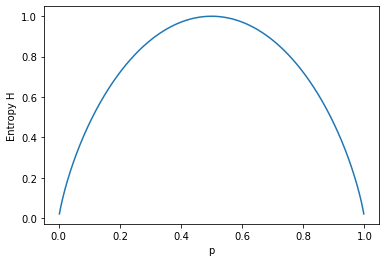

In [241]:
x, I = Entropy_visual(500)
plt.plot(I,x)
plt.xlabel("p")
plt.ylabel("Entropy H")

# Plotting Sample mean values for different 

It can be seen that as we increase the number variables in the sequence, then it moves closer and closer to the theoretical approximation values

In [242]:
Len1 = 50
Len2 = 100
Len3 = 1000
Len4 = 5000

fig = plt.figure()
x_1=[]
for i in I:
    x_1.append(sample_mean_log_prob(generate_sequence(Len1, i),i))
x_2=[]
for i in I:
    x_2.append(sample_mean_log_prob(generate_sequence(Len2, i),i))
x_3=[]
for i in I:
    x_3.append(sample_mean_log_prob(generate_sequence(Len3, i),i))
x_4=[]
for i in I:
    x_4.append(sample_mean_log_prob(generate_sequence(Len4, i),i))

<Figure size 432x288 with 0 Axes>

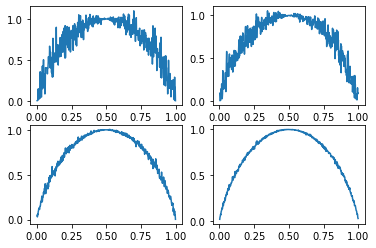

In [243]:
plt.subplot(2, 2, 1)
plt.plot(I,x_1)
plt.subplot(2, 2, 2)
plt.plot(I,x_2)
plt.subplot(2, 2, 3)
plt.plot(I,x_3)
plt.subplot(2, 2, 4)
plt.plot(I,x_4)

# Construction of Typical Set 
## Varying the value of epsilon and checking the size of typical set

* epsilon=0.1
* Len =  100
* num_ex=2000
* p=0.2

In [17]:
epsilon=0.1
Len =  [128, 256, 512, 1024]
num_ex=2048
p=0.2
Ty = []
El = []
for l in Len:
    X_ = generate_examples(num_ex=num_ex, p=p, Len=l)
    TypSet, elseSet  = get_typical_set(X_, epsilon=epsilon, p=p)
    Ty.append(TypSet)
    El.append(elseSet)
for i in range(4):
    print(len(Ty[i]))

1689
1937
2040
2048


In [18]:
epsilon=0.05
Len =  [128, 256, 512, 1024]
num_ex=2048
p=0.2
Ty = []
El = []
for l in Len:
    X_ = generate_examples(num_ex=num_ex, p=p, Len=l)
    TypSet, elseSet  = get_typical_set(X_, epsilon=epsilon, p=p)
    Ty.append(TypSet)
    El.append(elseSet)
for i in range(4):
    print(len(Ty[i]))

1009
1412
1756
1946


In [19]:
epsilon=0.01
Len =  [128, 256, 512, 1024]
num_ex=2048
p=0.2
Ty = []
El = []
for l in Len:
    X_ = generate_examples(num_ex=num_ex, p=p, Len=l)
    TypSet, elseSet  = get_typical_set(X_, epsilon=epsilon, p=p)
    Ty.append(TypSet)
    El.append(elseSet)
for i in range(4):
    print(len(Ty[i]))

392
373
457
577


## Varying the pmf "p" value and observing the size of Typical Set

In [22]:
TT = []
EE = []
PP = [0.02*i for i in range(1, 50)]
for p in PP:
    epsilon=0.1
    Len = [128, 256, 512, 1024]
    num_ex=2000
    Ty = []
    El = []
    for l in Len:
        X_ = generate_examples(num_ex=num_ex, p=p, Len=l)
        TypSet, elseSet  = get_typical_set(X_, epsilon=epsilon, p=p)
        Ty.append(TypSet)
        El.append(elseSet)
    TT.append(Ty)
    EE.append(El)

In [ ]:
epsilon_=[0.03,0.05, 0.08, 0.1, 0.15]
Len_ =  [8, 9, 10,11, 12]
num_ex=200000
p_=[0.1, 0.2, 0.25, 0.3]
TypicalSET = {}
X_TOTAL = {}
PERCENTAGE = {}
LENT = {}
LENX_ = {}
for Len in tqdm(Len_):
    for p in tqdm(p_):
        for epsilon in tqdm(epsilon_):
            X_ = generate_examples(num_ex=num_ex, p=p, Len=Len)
            TypSet, X_= get_typical_set(X_, epsilon=epsilon, p=p)
            percentage, lenT, lenX_= getTypicalPerc(TypSet,X_)
            key = (Len, p, epsilon)
            TypicalSET[key] = TypSet
            X_TOTAL[key] = X_
            PERCENTAGE[key] = percentage
            LENT[key]= lenT
            LENX_[key]= lenX_
            

In [ ]:
for key in LENT.keys():
    print(str(key)+ " "+str(LENT[key]))

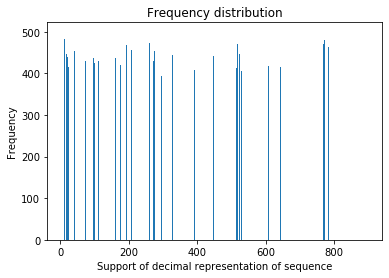

In [191]:
k = (10, 0.3, 0.08)
plt.hist(x= TypicalSET[k], bins=1024)
plt.xlabel("Support of decimal representation of sequence")
plt.ylabel("Frequency")
plt.title("Frequency distribution")
plt.show()


## Typical Set : Size and percentage analysis

In [206]:
l = [8, 9, 10, 11, 12]
for a in l:
    k = (a, 0.2, 0.1)
    print("Size of typical set is {} with total being {} and percentage being {}".format(LENT[k], LENX_[k], 100*PERCENTAGE[k]))

Size of typical set is 17 with total being 256 and percentage being 6.640625
Size of typical set is 36 with total being 496 and percentage being 7.258064516129033
Size of typical set is 45 with total being 930 and percentage being 4.838709677419355
Size of typical set is 55 with total being 1750 and percentage being 3.1428571428571432
Size of typical set is 272 with total being 3043 and percentage being 8.938547486033519


In [207]:
l = [8, 9, 10, 11, 12]
for a in l:
    k = (a, 0.1, 0.1)
    print("Size of typical set is {} with total being {} and percentage being {}".format(LENT[k], LENX_[k], 100*PERCENTAGE[k]))

Size of typical set is 8 with total being 214 and percentage being 3.7383177570093453
Size of typical set is 9 with total being 365 and percentage being 2.4657534246575343
Size of typical set is 10 with total being 603 and percentage being 1.658374792703151
Size of typical set is 11 with total being 916 and percentage being 1.2008733624454149
Size of typical set is 12 with total being 1381 and percentage being 0.8689355539464156


In [208]:
l = [8, 9, 10, 11, 12]
for a in l:
    k = (a, 0.25, 0.1)
    print("Size of typical set is {} with total being {} and percentage being {}".format(LENT[k], LENX_[k], 100*PERCENTAGE[k]))

Size of typical set is 28 with total being 256 and percentage being 10.9375
Size of typical set is 36 with total being 512 and percentage being 7.03125
Size of typical set is 165 with total being 1010 and percentage being 16.33663366336634
Size of typical set is 165 with total being 1941 and percentage being 8.500772797527048
Size of typical set is 220 with total being 3619 and percentage being 6.079027355623101


In [209]:
l = [8, 9, 10, 11, 12]
for a in l:
    k = (a, 0.3, 0.1)
    print("Size of typical set is {} with total being {} and percentage being {}".format(LENT[k], LENX_[k], 100*PERCENTAGE[k]))

Size of typical set is 84 with total being 256 and percentage being 32.8125
Size of typical set is 120 with total being 512 and percentage being 23.4375
Size of typical set is 120 with total being 1024 and percentage being 11.71875
Size of typical set is 495 with total being 2029 and percentage being 24.396254312469196
Size of typical set is 715 with total being 3964 and percentage being 18.03733602421796


In [210]:
TS = [8, 9, 10, 11, 12]
TS1 = [17, 36, 45, 55, 272]
TS2 = [28, 36, 165, 165, 220]
TS3 = [84, 120, 120, 495, 715]

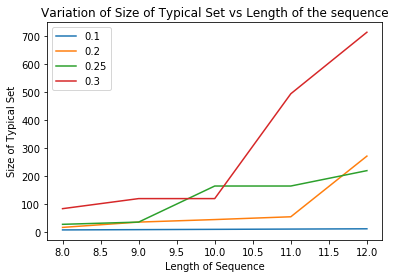

In [215]:
plt.plot(Len_ , TS, label="0.1")
plt.plot(Len_ , TS1, label="0.2")
plt.plot(Len_ , TS2, label="0.25")
plt.plot(Len_ , TS3, label="0.3")
plt.xlabel("Length of Sequence")
plt.ylabel("Size of Typical Set")
plt.title("Variation of Size of Typical Set vs Length of the sequence")
plt.legend(loc='upper left')
plt.show()


## Typical Set size emperical estimation

In [221]:
for n in Len_:
    for p in p_:
        print(str(n)+ " "+str(p)+" "+str(math.pow(2, n*calculate_entropy(p))))

8 0.1 13.472678057860175
8 0.2 54.77420592293905
8 0.25 89.89849108367625
8 0.3 132.5439669522823
9 0.1 18.64814655128391
9 0.2 90.34374752702698
9 0.25 157.75075722515686
9 0.3 244.14900581989696
10 0.1 25.811747917131978
10 0.2 149.01161193847648
10 0.25 276.8155628101422
10 0.3 449.7280292229677
11 0.1 35.727214428808544
11 0.2 245.77750093730057
11 0.25 485.7463581269953
11 0.3 828.4092724013533
12 0.1 49.451662666938574
12 0.2 405.38169597095083
12 0.25 852.3708784230041
12 0.3 1525.9487468153832


### It can be clearly seen that these upper cap values that are determined by using the mathematical values of Entropy are far from the size that we saw. The reason is clear that the Length of Sequence 12 is not enough to have a proper approximation of sample mean to the Entropy value